<a href="https://colab.research.google.com/github/clopensesame/Nazzaro_DSPN_S24/blob/main/Exercise_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [1]:
# If you are running this on your local computer, wet your workign directory to
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer.
#setwd("~/Documents/PittCMU/G3/DSPN/DataSciencePsychNeuro/Homeworks/hcp_data")

# If you are running this on Colab, then use something like this.
# system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")
install.packages(c("class","tidyverse"))
library(class)
library(tidyverse)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#file on desktop
d1 <- read.csv("/content/unrestricted_trimmed_1_7_2020_10_50_44.csv")
d1 <- d1 %>%
  select(Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol) %>%
  na.omit()

head(d1)

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

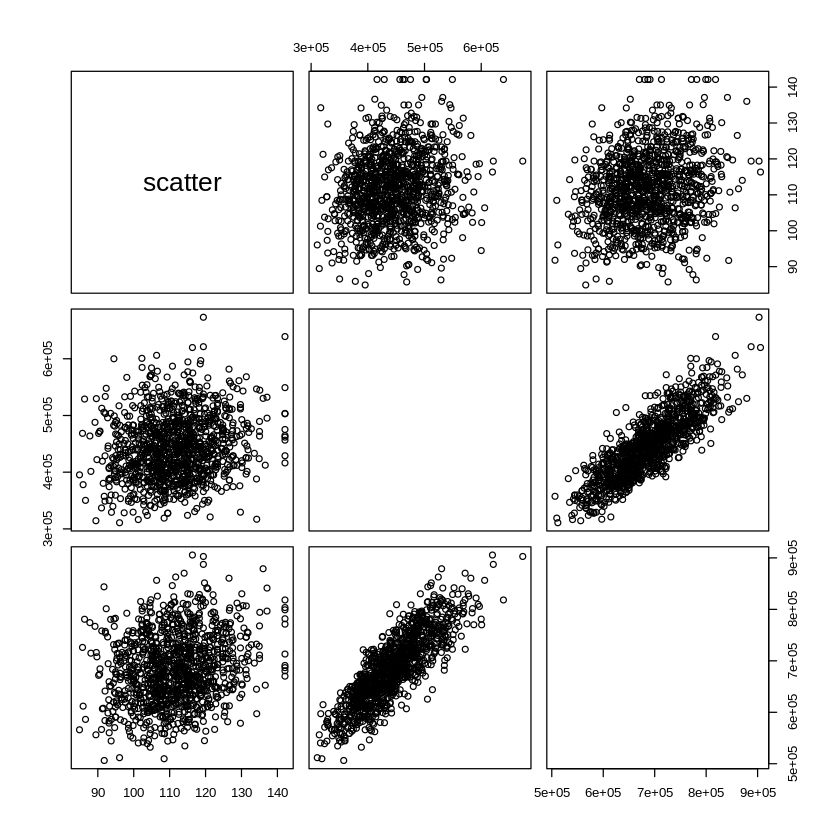

In [3]:
d1_num <- d1 %>%
  select(Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol)
pairs(d1_num, "scatter")

> * Total white matter volume and total grey matter volume appear positively correlated. Flanker Task performance does not appear correlated with either.

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [4]:
model <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)
summary(model)
confint(model, level = 0.95)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> * Mean Coefficient Values
> * B0: 9.026e+01 with a (8.428917e+01, 9.622375e+01) 95% CI
> * B1: 3.110e-05 with a (2.244198e-05, 3.975733e-05) 95% CI
> * Since p = 3.18e-12 < 0.05 for our B1, we conclude that grey matter volume is significantly associated with Flanker Task performance.

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see.

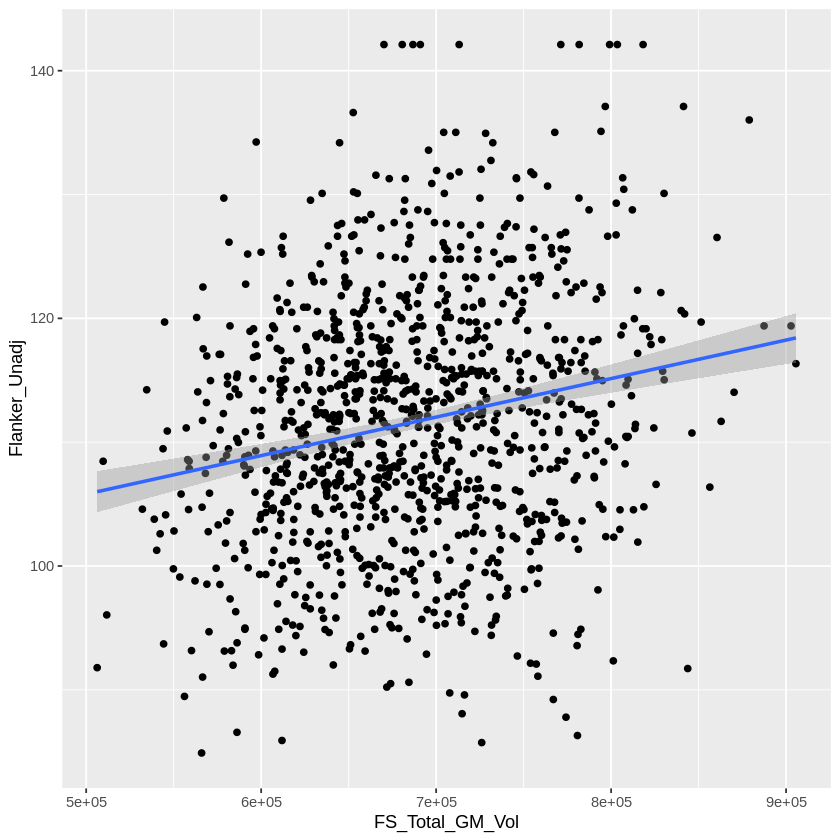

In [6]:
ggplot(d1, aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
    geom_point() +
    geom_smooth(method = "lm", formula = y ~ x, se = TRUE)

> * We see a positive association between total grey matter volume and Flanker Test performance, with largest confidence intervals at the low and high ends of total grey matter volume and smallest confidence interval toward the middle where points are the densest.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> * There is a positive association between total grey matter volume and Flanker Test performance. There is possibly also a positive association between white matter volume and Flanker test performance, and likely a high positive association between white matter volume and grey matter volume.

**DUE:** 5pm EST, February 26, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*